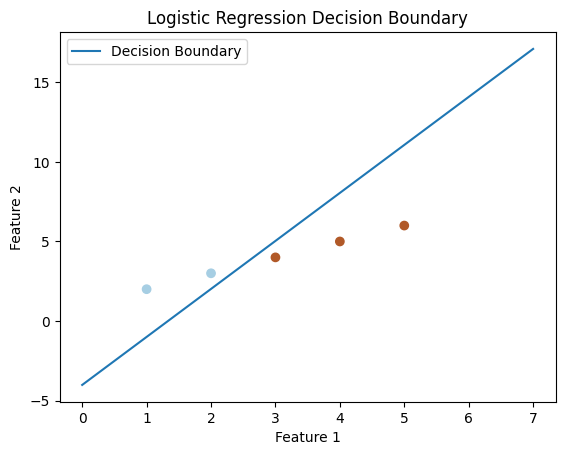

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def logistic_regression(X, y, lr=0.01, num_iter=100000, verbose=False):
    X = add_intercept(X)
    theta = np.zeros(X.shape[1])

    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient

        if verbose and i % 10000 == 0:
            print(f'Loss: {loss(h, y)} \t')

    return theta

def predict_prob(X, theta):
    X = add_intercept(X)
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold=0.5):
    return predict_prob(X, theta) >= threshold

# Generate some sample data
np.random.seed(0)
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y_train = np.array([0, 0, 1, 1, 1])

# Train logistic regression model
theta = logistic_regression(X_train, y_train, lr=0.1, num_iter=300000)

# Plot decision boundary
x_values = [np.min(X_train[:, 0] - 1), np.max(X_train[:, 1] + 1)]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
%matplotlib inline

In [ ]:
X = np.array([[-0.64185521, 0.78535215],
              [0.10972634, 1.83671408],
              [-1.07362634, 2.591487],
              [-1.38222372, 0.85340843],
              [1.78689446, 2.3841826],
              [0.94785273, 3.53015683],
              [1.08876018, 1.35925144],
              [0.42774158, 3.54015499],
              [-0.88398194, -0.57876171],
              [-1.59347411, 1.2168913]])

y = np.array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1])


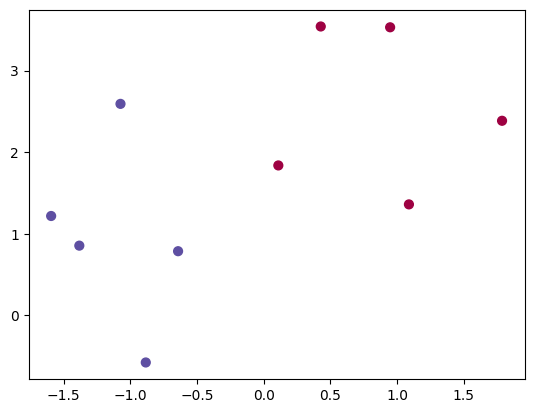

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [ ]:
XX = add_intercept(X)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

print(XX)
print(theta)
print(h)

[[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]
[0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [ ]:
loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(loss)

0.6931471805599453


In [ ]:
m = y.size
alpha = 0.01

gradient = np.dot(XX.T, (h - y)) / m
theta -= alpha * gradient

print(gradient)
print(theta)

[0.         0.49680683 0.38910414]
[ 0.         -0.00496807 -0.00389104]


In [ ]:
#training
num_iter = 100000
loss_list = []

for i in range(num_iter):
    h = calc_h(XX, theta)
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    loss_list.append(loss)

    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient


    if i % 10000 == 0:
        print('Loss: {}'.format(loss))

print('Adjusted coefficient: {}'.format(theta))

Loss: 0.6891798102202178
Loss: 0.029018964019189974
Loss: 0.016868363206842867
Loss: 0.011987504977676828
Loss: 0.0093156136427775
Loss: 0.007622970232110064
Loss: 0.006452771985951547
Loss: 0.005594848428569359
Loss: 0.004938665800439486
Loss: 0.004420439145186511
Adjusted coefficient: [ 0.66203063 -8.49512414 -1.97751375]


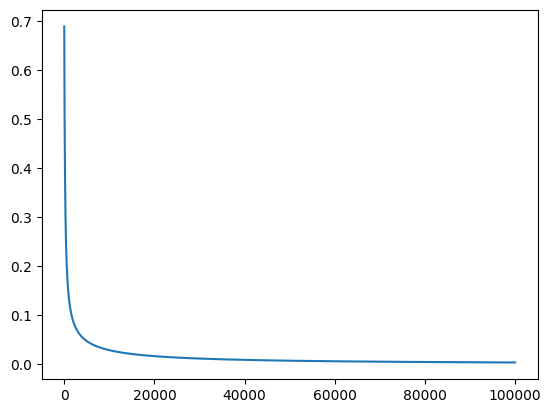

In [ ]:
plt.plot(range(num_iter), loss_list)

In [ ]:
preds_prob = calc_h(XX, theta)
print(preds_prob)

[9.89662906e-01 1.97968773e-02 9.90602955e-01 9.99977826e-01
 4.43999086e-09 5.73774006e-07 1.26852157e-05 4.66685977e-05
 9.99910042e-01 9.99992438e-01]


In [ ]:
preds = preds_prob.round()
print(preds)

[1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


In [ ]:
new_x = np.array([1, -0.12, 0.18])   # new observation with an intercept of 1
print(new_x)
preds_prob_new_x = calc_h(new_x, theta).round()
print("predicted output for the new observation: ", preds_prob_new_x)

[ 1.   -0.12  0.18]
predicted output for the new observation:  1.0


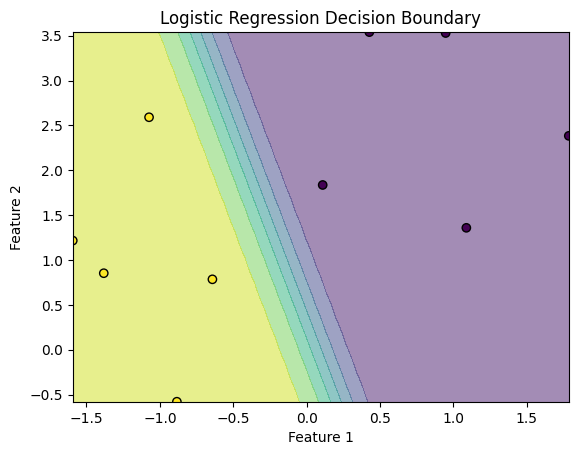

In [ ]:
# plt.figure(figsize=(10, 6))

# define 2d grid
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
grid = add_intercept(grid)
probs = calc_h(grid, theta)
probs = probs.reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

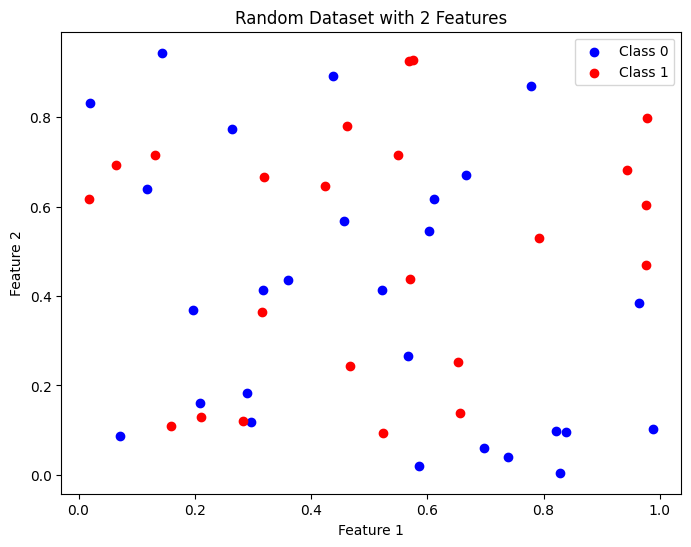

LR classification accuracy: 0.5


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def compute_gradients(X, y, weights, bias):
    n_samples = X.shape[0]
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
    db = (1 / n_samples) * np.sum(y_predicted - y)
    return dw, db

def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

def logistic_regression(X_train, y_train, learning_rate=0.001, n_iters=1000):
    n_samples, n_features = X_train.shape
    weights, bias = initialize_parameters(n_features)

    for _ in range(n_iters):
        dw, db = compute_gradients(X_train, y_train, weights, bias)
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate)

    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return np.array(y_predicted_cls)

# Example usage
def main():
    # Synthetic dataset creation
    np.random.seed(0)
    X = np.random.rand(50, 2)
    y = np.random.randint(0, 2, size=50)

# Plot the data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Random Dataset with 2 Features')
    plt.legend()
    plt.show()


    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    # Train logistic regression model
    weights, bias = logistic_regression(X_train, y_train)

    # Make predictions on the test set
    predictions = predict(X_test, weights, bias)

    # Calculate accuracy
    accuracy = np.sum(y_test == predictions) / len(y_test)
    print("LR classification accuracy:", accuracy)


if __name__ == "__main__":
    main()


Dataset:
Sample 1: Features=[0.5488135  0.71518937], Label=1
Sample 2: Features=[0.60276338 0.54488318], Label=1
Sample 3: Features=[0.4236548  0.64589411], Label=1
Sample 4: Features=[0.43758721 0.891773  ], Label=1
Sample 5: Features=[0.96366276 0.38344152], Label=1
Sample 6: Features=[0.79172504 0.52889492], Label=0
Sample 7: Features=[0.56804456 0.92559664], Label=1
Sample 8: Features=[0.07103606 0.0871293 ], Label=1
Sample 9: Features=[0.0202184  0.83261985], Label=1
Sample 10: Features=[0.77815675 0.87001215], Label=1
Sample 11: Features=[0.97861834 0.79915856], Label=0
Sample 12: Features=[0.46147936 0.78052918], Label=1
Sample 13: Features=[0.11827443 0.63992102], Label=1
Sample 14: Features=[0.14335329 0.94466892], Label=0
Sample 15: Features=[0.52184832 0.41466194], Label=0
Sample 16: Features=[0.26455561 0.77423369], Label=1
Sample 17: Features=[0.45615033 0.56843395], Label=0
Sample 18: Features=[0.0187898 0.6176355], Label=0
Sample 19: Features=[0.61209572 0.616934  ], Lab

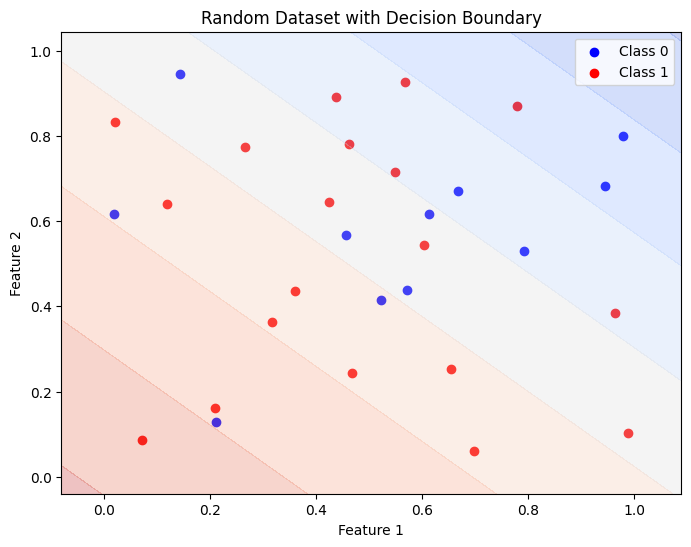

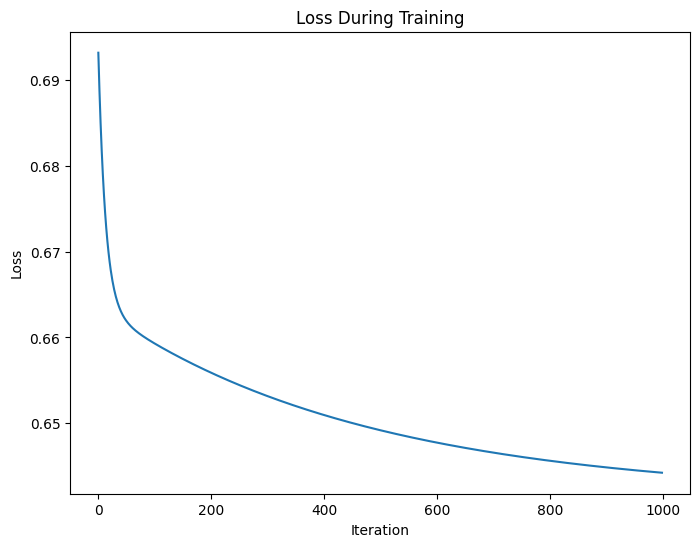

Accuracy: 63.33%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def train_logistic_regression(X, y, learning_rate=0.1, n_iters=1000):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0
    losses = []

    # Train logistic regression model
    for _ in range(n_iters):
        # Forward pass
        linear_model = np.dot(X, weights) + bias
        y_predicted = 1 / (1 + np.exp(-linear_model))  # sigmoidal func

        # Compute loss
        loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        losses.append(loss)

        # Backward pass
        dw = (1 / len(X)) * np.dot(X.T, (y_predicted - y))
        db = (1 / len(X)) * np.sum(y_predicted - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

# Generate random dataset
np.random.seed(0)  # for reproducibility
X = np.random.rand(30, 2)
y = np.random.randint(0, 2, size=30)

# Train logistic regression model
weights, bias, losses = train_logistic_regression(X, y)

# Print dataset
print("Dataset:")
for i in range(len(X)):
    print(f"Sample {i+1}: Features={X[i]}, Label={y[i]}")

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Dataset with Decision Boundary')

# Plot decision boundary using contour plot
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = 1 / (1 + np.exp(-(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.legend()
plt.show()

# Plot loss graph
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.show()

# Predict labels
y_predicted = 1 / (1 + np.exp(-(np.dot(X, weights) + bias)))
y_predicted_cls = np.round(y_predicted)

# Calculate accuracy
accuracy = np.mean(y_predicted_cls == y) * 100
print(f"Accuracy: {accuracy:.2f}%")


Dataset:
Sample 1: Features=[0.40661437 0.38714883], Label=1
Sample 2: Features=[0.07336806 0.34395827], Label=1
Sample 3: Features=[0.70390588 0.22321567], Label=1
Sample 4: Features=[0.70649512 0.66362785], Label=1
Sample 5: Features=[0.24425515 0.97501926], Label=0
Sample 6: Features=[0.30155762 0.98080054], Label=1
Sample 7: Features=[0.57275441 0.37865648], Label=0
Sample 8: Features=[0.26633008 0.50717591], Label=1
Sample 9: Features=[0.04433175 0.32107848], Label=0
Sample 10: Features=[0.57377161 0.94702411], Label=0
Sample 11: Features=[0.25770011 0.00613768], Label=0
Sample 12: Features=[0.494935   0.94836731], Label=1
Sample 13: Features=[0.8909615  0.57769209], Label=1
Sample 14: Features=[0.65278341 0.45382235], Label=0
Sample 15: Features=[0.94121753 0.73778756], Label=0
Sample 16: Features=[0.90714702 0.48831047], Label=0
Sample 17: Features=[0.81611652 0.09325955], Label=0
Sample 18: Features=[0.68723677 0.47902179], Label=0
Sample 19: Features=[0.94638102 0.21776117], L

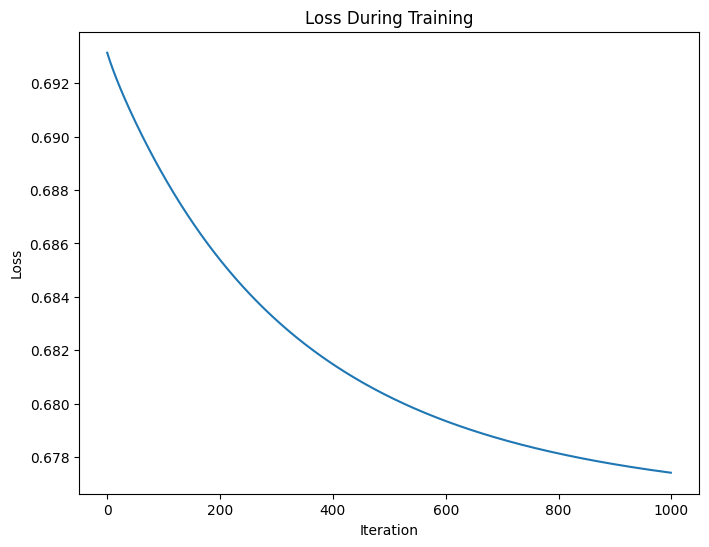

Accuracy: 60.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random dataset
X = np.random.rand(30, 2)
y = np.random.randint(0, 2, size=30)

# Initialize parameters
learning_rate = 0.1
n_iters = 1000
weights = np.zeros(X.shape[1])
bias = 0
losses = []

# Train logistic regression model
for _ in range(n_iters):
    linear_model = np.dot(X, weights) + bias
    y_predicted = 1 / (1 + np.exp(-linear_model)) #sigmoidal func

    loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
    losses.append(loss)

    dw = (1 / len(X)) * np.dot(X.T, (y_predicted - y))
    db = (1 / len(X)) * np.sum(y_predicted - y)

    weights -= learning_rate * dw
    bias -= learning_rate * db

# Print dataset
print("Dataset:")
for i in range(len(X)):
    print(f"Sample {i+1}: Features={X[i]}, Label={y[i]}")



# Plot loss graph
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.show()

# Predict labels
y_predicted = 1 / (1 + np.exp(-(np.dot(X, weights) + bias)))
y_predicted_cls = np.round(y_predicted)

# Calculate accuracy
accuracy = np.mean(y_predicted_cls == y) * 100
print(f"Accuracy: {accuracy:.2f}%")


In [ ]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Dataset with Decision Boundary')
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.legend()
plt.show()

Dataset:
Sample 1: Features=[0.5488135  0.71518937], Label=1
Sample 2: Features=[0.60276338 0.54488318], Label=1
Sample 3: Features=[0.4236548  0.64589411], Label=1
Sample 4: Features=[0.43758721 0.891773  ], Label=1
Sample 5: Features=[0.96366276 0.38344152], Label=1
Sample 6: Features=[0.79172504 0.52889492], Label=0
Sample 7: Features=[0.56804456 0.92559664], Label=1
Sample 8: Features=[0.07103606 0.0871293 ], Label=1
Sample 9: Features=[0.0202184  0.83261985], Label=1
Sample 10: Features=[0.77815675 0.87001215], Label=1
Sample 11: Features=[0.97861834 0.79915856], Label=0
Sample 12: Features=[0.46147936 0.78052918], Label=1
Sample 13: Features=[0.11827443 0.63992102], Label=1
Sample 14: Features=[0.14335329 0.94466892], Label=0
Sample 15: Features=[0.52184832 0.41466194], Label=0
Sample 16: Features=[0.26455561 0.77423369], Label=1
Sample 17: Features=[0.45615033 0.56843395], Label=0
Sample 18: Features=[0.0187898 0.6176355], Label=0
Sample 19: Features=[0.61209572 0.616934  ], Lab

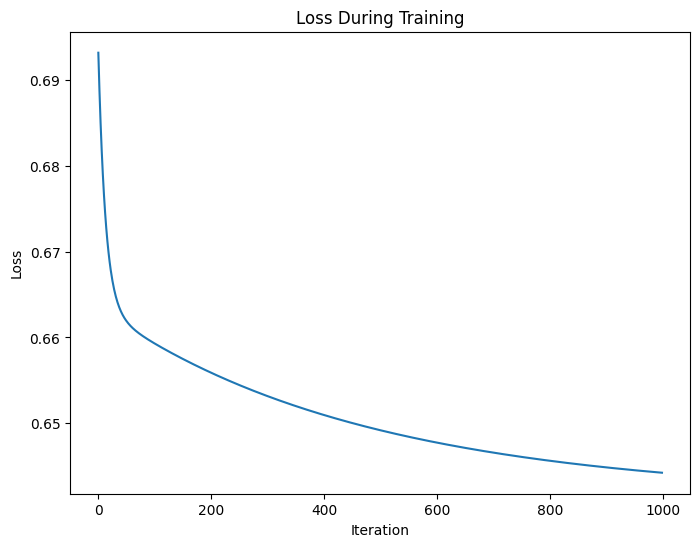

Accuracy: 63.33%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def train_logistic_regression(X, y, learning_rate=0.1, n_iters=1000):

    weights = np.zeros(X.shape[1])
    bias = 0
    losses = []


    for _ in range(n_iters):

        linear_model = np.dot(X, weights) + bias
        y_predicted = 1 / (1 + np.exp(-linear_model))  # sigmoidal func


        loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        losses.append(loss)


        dw = (1 / len(X)) * np.dot(X.T, (y_predicted - y))
        db = (1 / len(X)) * np.sum(y_predicted - y)


        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

# Generate random dataset
np.random.seed(0)
X = np.random.rand(30, 2)
y = np.random.randint(0, 2, size=30)

# Train logistic regression model
weights, bias, losses = train_logistic_regression(X, y)

# Print dataset
print("Dataset:")
for i in range(len(X)):
    print(f"Sample {i+1}: Features={X[i]}, Label={y[i]}")


# Plot loss graph
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.show()

# Predict labels
y_predicted = 1 / (1 + np.exp(-(np.dot(X, weights) + bias)))
y_predicted_cls = np.round(y_predicted)

# Calculate accuracy
accuracy = np.mean(y_predicted_cls == y) * 100
print(f"Accuracy: {accuracy:.2f}%")
